In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.30)

In [3]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
from xgboost import XGBClassifier

In [5]:
xgb_model=XGBClassifier().fit(X_train,y_train)

In [6]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
           colsample_bylevel=1 <...> timators=100,
           n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
File:        c:\users\sevva\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optio

In [7]:
y_pred=xgb_model.predict(X_test)

In [8]:
accuracy_score(y_test,y_pred)

0.7359307359307359

### Model Tuned

In [9]:
xgb=XGBClassifier()

In [10]:
xgb_params={"n_estimators":[100,500,1000], "subsample":[0.6,0.8,1],"max_depth":[3,5,7],"learning_rate":[0.1,0.01]}

In [13]:
xgb_cv_model=GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


In [14]:
xgb_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1}

In [15]:
xgb_tuned=XGBClassifier(learning_rate=0.01,max_depth=3,n_estimators=500,subsample=1).fit(X_train,y_train)

In [16]:
y_pred=xgb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

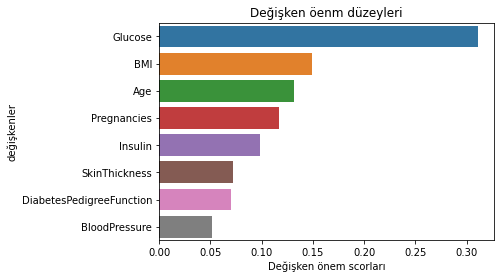

In [17]:
feature_imp=pd.Series(xgb_tuned.feature_importances_,index=X_train.columns).sort_values(ascending=False)

import seaborn as sns
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel("Değişken önem scorları")
plt.ylabel("değişkenler")
plt.title("Değişken öenm düzeyleri")
plt.show()